In [1]:
import sys
sys.path.append('../')

import pandas as pd
import json

import stock_service as sv

In [2]:
sv.run().keys()

dict_keys(['meta_data', 'data_for_all_days'])

In [3]:
pd.json_normalize(sv.run()['meta_data']).T

,0
1. Information,Daily Prices and Volumes for Digital Currency
2. Digital Currency Code,BTC
3. Digital Currency Name,Bitcoin
4. Market Code,CNY
5. Market Name,Chinese Yuan
6. Last Refreshed,2020-07-12 00:00:00
7. Time Zone,UTC


In [4]:
pd.read_json(json.dumps(sv.run()['data_for_all_days'], ensure_ascii=False)).T

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
2020-07-12,64619.67196,9234.02,64861.10296,9268.52,64595.80878,9230.61,64801.41002,9259.99,688.296306,688.296306
2020-07-11,64999.80332,9288.34,65076.36144,9299.28,64229.39350,9178.25,64619.74194,9234.03,22561.366000,22561.366000
2020-07-10,64608.47516,9232.42,65203.72504,9317.48,63856.75000,9125.00,64999.80332,9288.34,38295.494006,38295.494006
2020-07-09,66033.54788,9436.06,66066.64842,9440.79,64101.68000,9160.00,64608.54514,9232.43,48044.450645,48044.450645
2020-07-08,64783.28520,9257.40,66271.06000,9470.00,64598.53800,9231.00,66033.54788,9436.06,56140.517781,56140.517781
...,...,...,...,...,...,...,...,...,...,...
2017-10-21,42084.01256,6013.72,43184.65800,6171.00,40938.50994,5850.03,42162.74006,6024.97,1664.307693,1664.307693
2017-10-20,39771.80338,5683.31,42757.78000,6110.00,39188.80000,5600.00,42058.04998,6010.01,1972.977220,1972.977220
2017-10-19,38579.97400,5513.00,39958.58000,5710.00,38420.83948,5490.26,39775.93220,5683.90,1881.722107,1881.722107
2017-10-18,39153.81000,5595.00,39160.80800,5596.00,35255.57410,5037.95,38573.39588,5512.06,2317.804373,2317.804373


In [5]:
data_for_all_days = pd.json_normalize(sv.run()['data_for_all_days']).T

In [6]:
data_for_all_days.head()

,0
2020-07-12.1a. open (CNY),64619.67196000
2020-07-12.1b. open (USD),9234.02000000
2020-07-12.2a. high (CNY),64861.10296000
2020-07-12.2b. high (USD),9268.52000000
2020-07-12.3a. low (CNY),64595.80878000


In [7]:
data_for_all_days.columns = ['value']

In [8]:
# data
data_for_all_days['date'] = pd.to_datetime(data_for_all_days.index.map(lambda x: x[:10] if len(x) <= 26 else None))

# category
data_for_all_days['category'] =  data_for_all_days.index.map(lambda x: x[11:13] if len(x) <= 26 else None)

# status
data_for_all_days['status'] =  data_for_all_days.index.map(lambda x: x[15:18] if len(x) <= 26 else None)
adjust_dict_status = dict(
    ope = 'open',
    hig = 'high',
    clo = 'close',
    olu = 'volume'
)
data_for_all_days['status'] = data_for_all_days['status'].replace(adjust_dict_status)

# coin conversion
def get_coin(string : str):
    index_parenteses = string.find('(')
    if index_parenteses > 0:
        return string[index_parenteses+1:index_parenteses+4]
    return 'BTC'
data_for_all_days['coin_conversion'] = data_for_all_days.index.map(lambda x: get_coin(x) if len(x) <= 26 else None)

In [9]:
data_for_all_days.head(10)

,value,date,category,status,coin_conversion
2020-07-12.1a. open (CNY),64619.67196000,2020-07-12,1a,open,CNY
2020-07-12.1b. open (USD),9234.02000000,2020-07-12,1b,open,USD
2020-07-12.2a. high (CNY),64861.10296000,2020-07-12,2a,high,CNY
2020-07-12.2b. high (USD),9268.52000000,2020-07-12,2b,high,USD
2020-07-12.3a. low (CNY),64595.80878000,2020-07-12,3a,low,CNY
2020-07-12.3b. low (USD),9230.61000000,2020-07-12,3b,low,USD
2020-07-12.4a. close (CNY),64801.41002000,2020-07-12,4a,close,CNY
2020-07-12.4b. close (USD),9259.99000000,2020-07-12,4b,close,USD
2020-07-12.5. volume,688.29630600,2020-07-12,5.,volume,BTC
2020-07-12.6. market cap (USD),688.29630600,NaT,None,None,None


In [10]:
data_for_all_days = data_for_all_days.dropna()
data_for_all_days.index = data_for_all_days.date

In [11]:
data_for_all_days_usd = data_for_all_days.loc[data_for_all_days.coin_conversion == 'USD']
data_for_all_days_cny = data_for_all_days.loc[data_for_all_days.coin_conversion == 'CNY']

In [12]:
temp_df =  pd.DataFrame()
temp_df['open'] = data_for_all_days_usd.loc[data_for_all_days_usd.status == 'open'].value
temp_df['high'] = data_for_all_days_usd.loc[data_for_all_days_usd.status == 'high'].value
temp_df['low'] = data_for_all_days_usd.loc[data_for_all_days_usd.status == 'low'].value
temp_df['close'] = data_for_all_days_usd.loc[data_for_all_days_usd.status == 'close'].value
temp_df.index = data_for_all_days_usd.loc[data_for_all_days_usd.status == 'open'].index

In [13]:
data_for_all_days_usd = temp_df

In [14]:
import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc
data_for_all_days_usd['date'] = data_for_all_days_usd.index
data_for_all_days_usd['date'] = data_for_all_days_usd['date'].apply(mpl_dates.date2num)
data_for_all_days_usd = data_for_all_days_usd.astype(float)

/home/aantunesnds/.local/share/virtualenvs/stock-market-6rWeV0cO/lib/python3.6/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [26]:
data_for_all_days_usd

,date,open,high,low,close
date,,,,,
2020-07-12,737618.0,9234.02,9268.52,9230.61,9259.99
2020-07-11,737617.0,9288.34,9299.28,9178.25,9234.03
2020-07-10,737616.0,9232.42,9317.48,9125.00,9288.34
2020-07-09,737615.0,9436.06,9440.79,9160.00,9232.43
2020-07-08,737614.0,9257.40,9470.00,9231.00,9436.06
...,...,...,...,...,...
2017-10-21,736623.0,6013.72,6171.00,5850.03,6024.97
2017-10-20,736622.0,5683.31,6110.00,5600.00,6010.01
2017-10-19,736621.0,5513.00,5710.00,5490.26,5683.90


In [16]:
data_for_all_days_usd = data_for_all_days_usd[['date', 'open', 'high', 'low', 'close']]

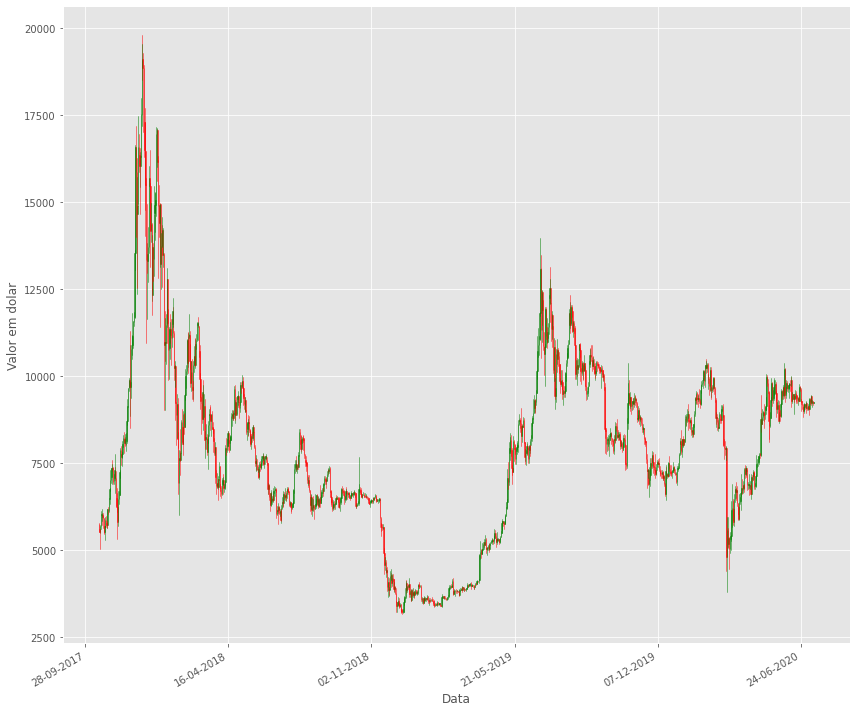

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_finance import candlestick_ohlc

def plot_candle(df):
    
    # Creating Subplots
    fig, ax = plt.subplots(figsize=(12,10))

    candlestick_ohlc(ax, 
                     df.values, 
                     width=0.6, 
                     colorup='green', 
                     colordown='red', 
                     alpha=0.8)

    # Setting labels & titles
    ax.set_xlabel('Data')
    ax.set_ylabel('Valor em dolar')

    # Formatting Date
    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    return plt.show()

plot_candle(data_for_all_days_usd)

In [19]:
data_for_all_days_usd.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='date', length=1000)

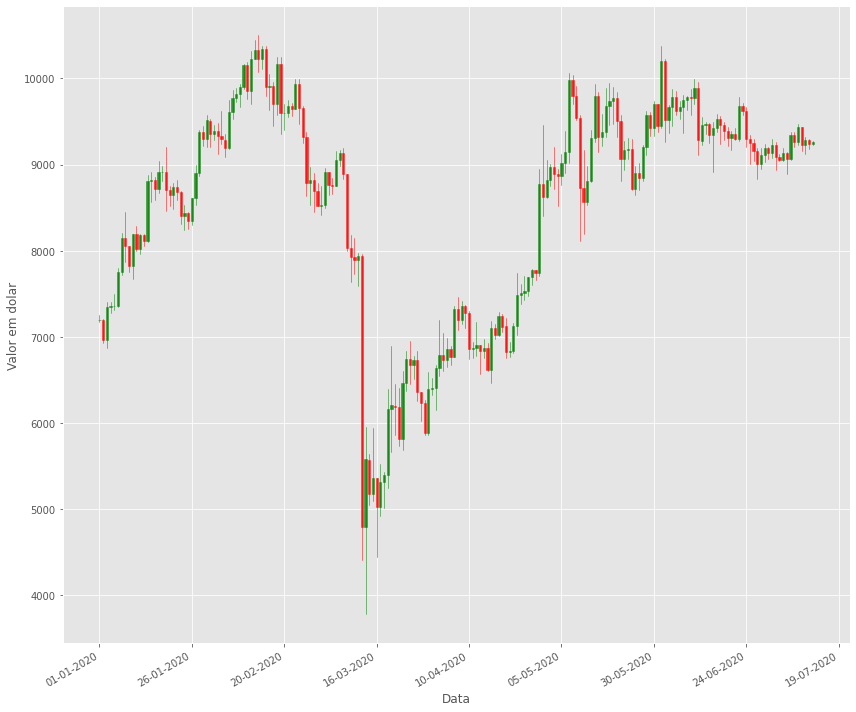

In [20]:
df_2020 = data_for_all_days_usd.loc[data_for_all_days_usd.index.year == 2020]
plot_candle(df_2020)

In [21]:
df_2020.index.month

Int64Index([7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='date', length=194)

In [22]:
df_jun_2020 = df_2020.loc[df_2020.index.month >= 6]

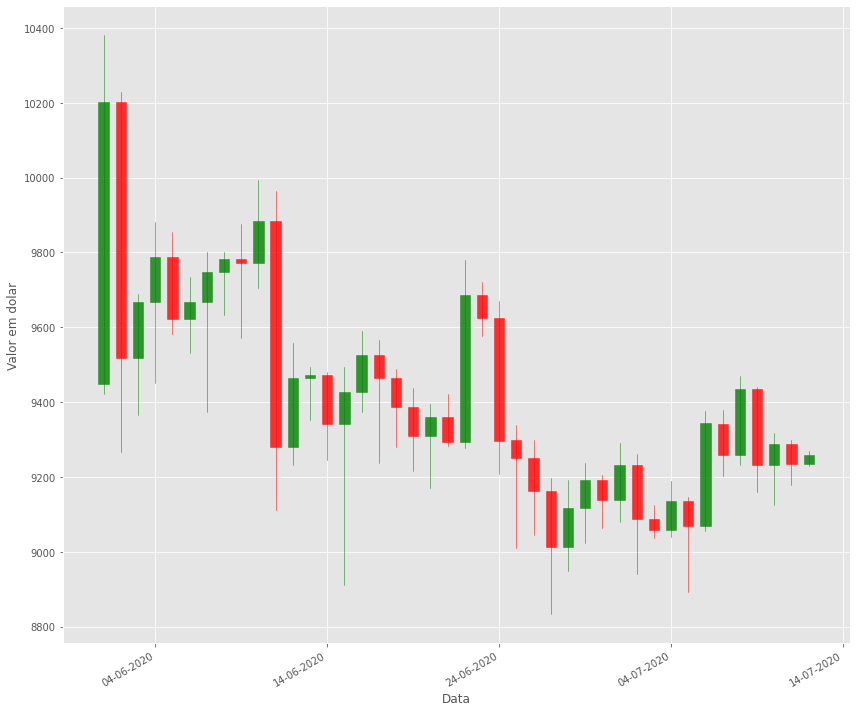

In [23]:
plot_candle(df_jun_2020)